## Standardization-from-scratch
<hr>

This is an example of how to perform a standardization without performing very complex procedures.

This notebook was based on the step-by-step instructions presented in this video:
> [![Vídeo](https://img.youtube.com/vi/FDCfw-YqWTE/0.jpg)](https://www.youtube.com/watch?v=FDCfw-YqWTE)

In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np

### Data Generation
Generating the data used in this example 

In [2]:
#Global Variables
MIN_X1 = 1
MAX_X1 = 5
MIN_X2 = 1
MAX_X2 = 2
N_SAMPLES = 50
N_FEATURES = 2

In [3]:
def GenerateDataset(n_samples, n_features, feature_range=None):
    """
    Generates data between the informed limits
    Parameters:
    n_samples (int): Number of samples.
    n_features (int): Number of features.
    feature_range (Array): Limits for each reported feature 
  
    Returns:
    np.array: Generated Dataset
    """
    data = np.random.rand(n_samples,n_features)
    
    if(feature_range):
        for i in range(n_features):
            aux = feature_range[i][1] - feature_range[i][0]
            data[:,i] *= aux
            data[:,i] += feature_range[i][0]
            
    return data

X = GenerateDataset(N_SAMPLES, N_FEATURES, [[MIN_X1, MAX_X1], [MIN_X2, MAX_X2]])
Z = X.copy()

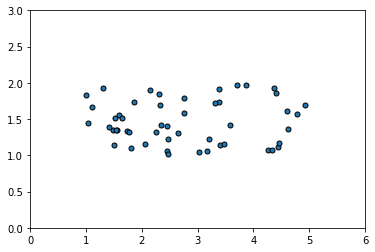

In [4]:
#Dataset View
plt.xlim(MIN_X1-1, MAX_X1+1)
plt.ylim(MIN_X2-1, MAX_X2+1)
plt.scatter(X[:, 0], X[:, 1], marker='o',
            s=25, edgecolor='k')
plt.show()

### Mean subtraction 
First step: Subtract the average calculated for all features in the dataset 

In [5]:
mean = np.mean(X, axis=0)
for i in range(N_FEATURES):
    X[:,i] -= mean[i] 

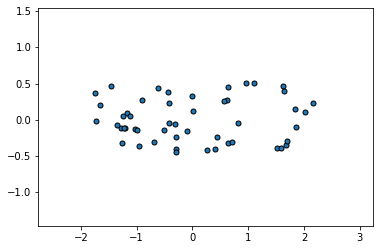

In [6]:
#Dataset View
plt.xlim(MIN_X1-1-mean[0], MAX_X1+1-mean[0])
plt.ylim(MIN_X2-1-mean[1], MAX_X2+1-mean[1])
plt.scatter(X[:, 0], X[:, 1], marker='o',
            s=25, edgecolor='k')
plt.show()

### Normalize the variance
Second step: Normalize dataset variances so that they all have the same distribution.

In [7]:
std = np.std(X, axis=0)
for i in range(N_FEATURES):
    X[:,i] /= std[i]

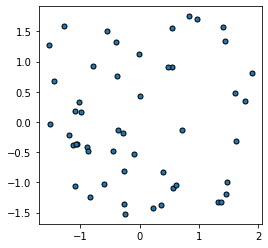

In [8]:
#Dataset View
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], marker='o',
            s=25, edgecolor='k')
plt.show()

### Experiments: Data between -1 and 1 
A simple example for putting data between -1 and 1 

In [9]:
max1 = np.max(np.absolute(X))
X /= max1

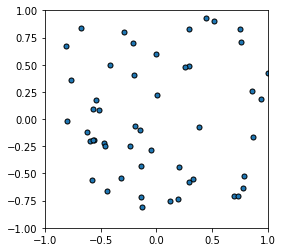

In [10]:
#Dataset View
plt.figure(figsize=(4,4))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o',
            s=25, edgecolor='k')
plt.show()